In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')

In [2]:
train_df = pd.read_csv("data/trainHousing.csv", delimiter=',')
test_df = pd.read_csv("data/testHousing.csv", delimiter=',')

In [3]:
train_df.drop(columns='Id', inplace=True)
train_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
test_df.drop(columns='Id', inplace=True)
test_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [5]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


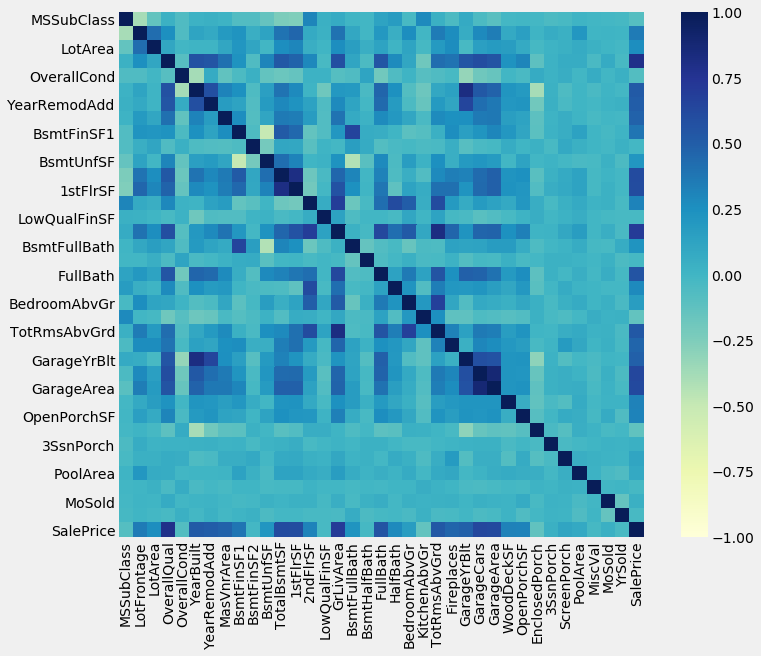

In [6]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True, cmap="YlGnBu");

In [7]:
high_corr_ls = ['OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'SalePrice']
high_corr_df = train_df[high_corr_ls]

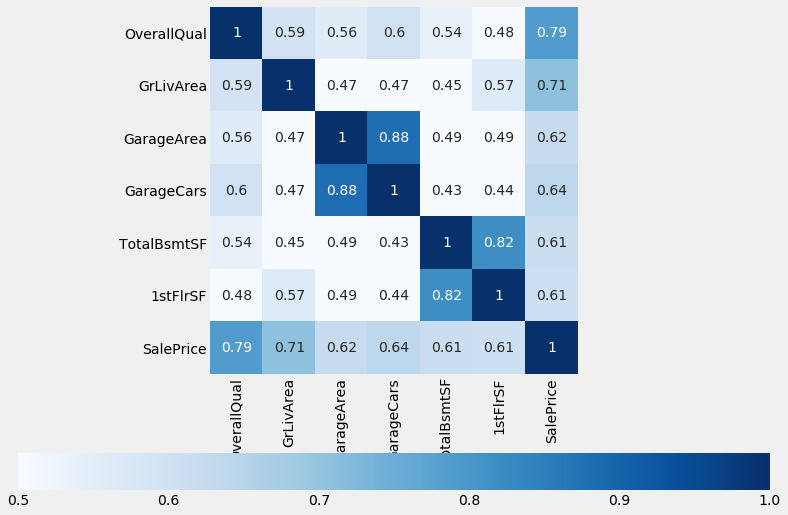

In [8]:
corrHigh = high_corr_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrHigh, vmin=0.5, vmax=1, square=True, cmap="Blues", annot=True, cbar_kws={"orientation": "horizontal"});

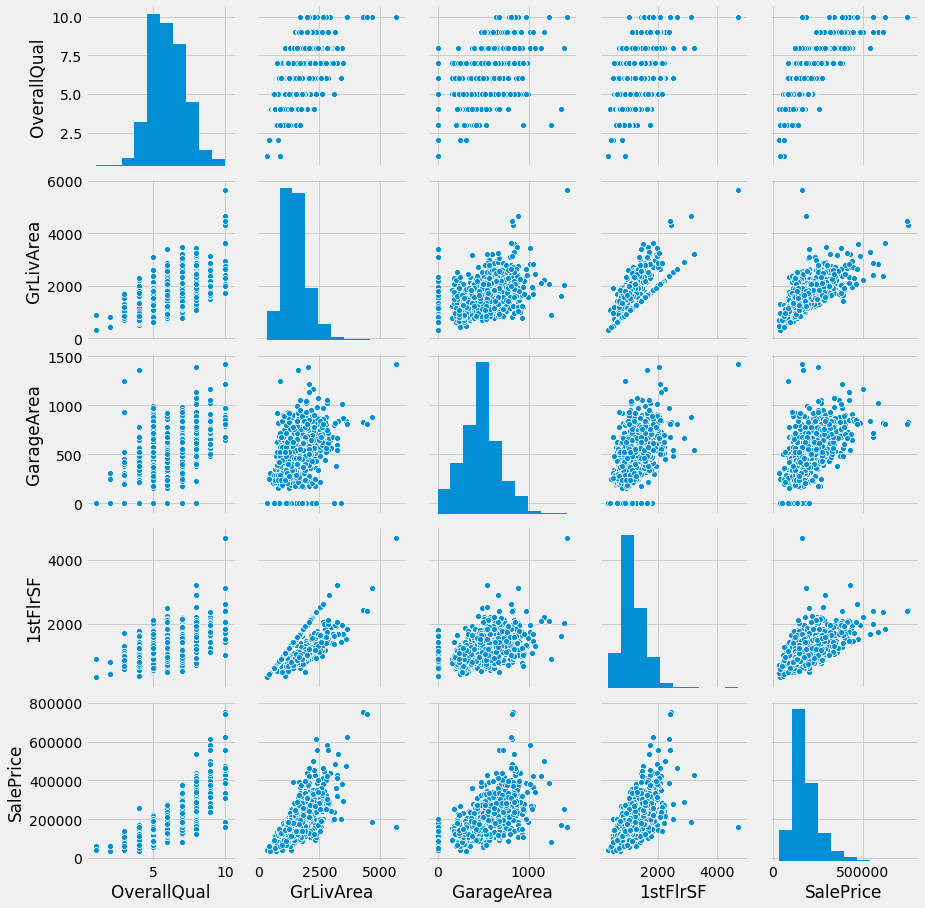

In [9]:
train_variables = ['OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF', 'SalePrice']
sns.pairplot(train_df[train_variables], height= 2.5)
plt.show()

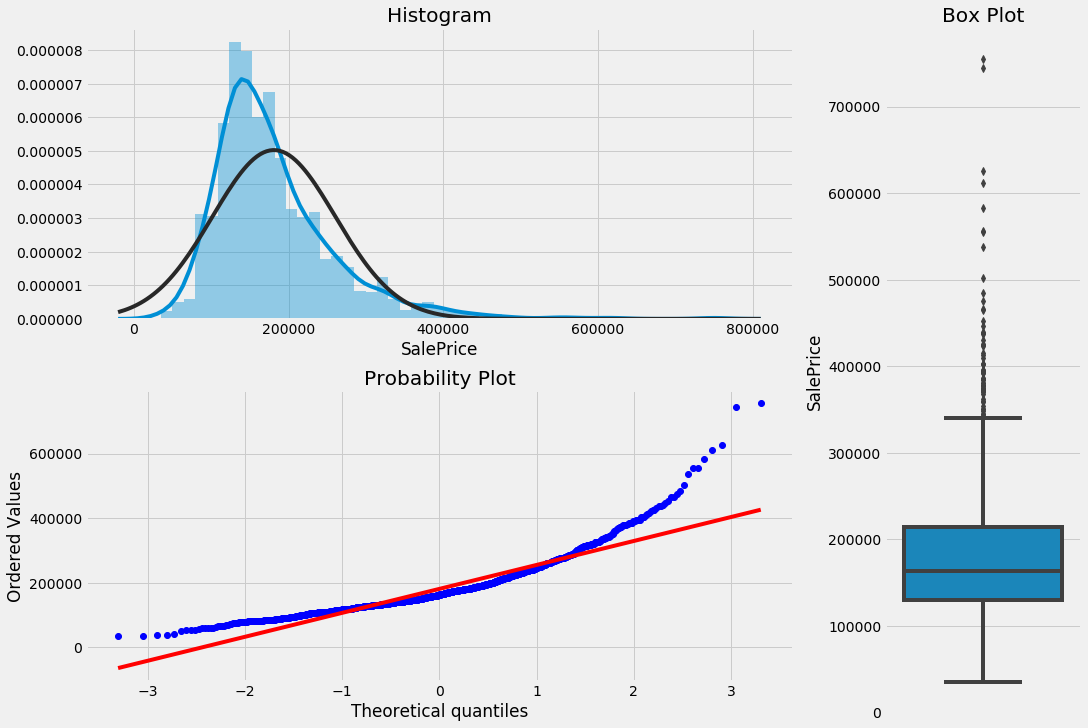

In [10]:
import matplotlib.gridspec as gridspec
from scipy import stats
from scipy.stats import norm
def analyze_target(df, feature):
## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, fit=norm, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 )
    
analyze_target(train_df, 'SalePrice')

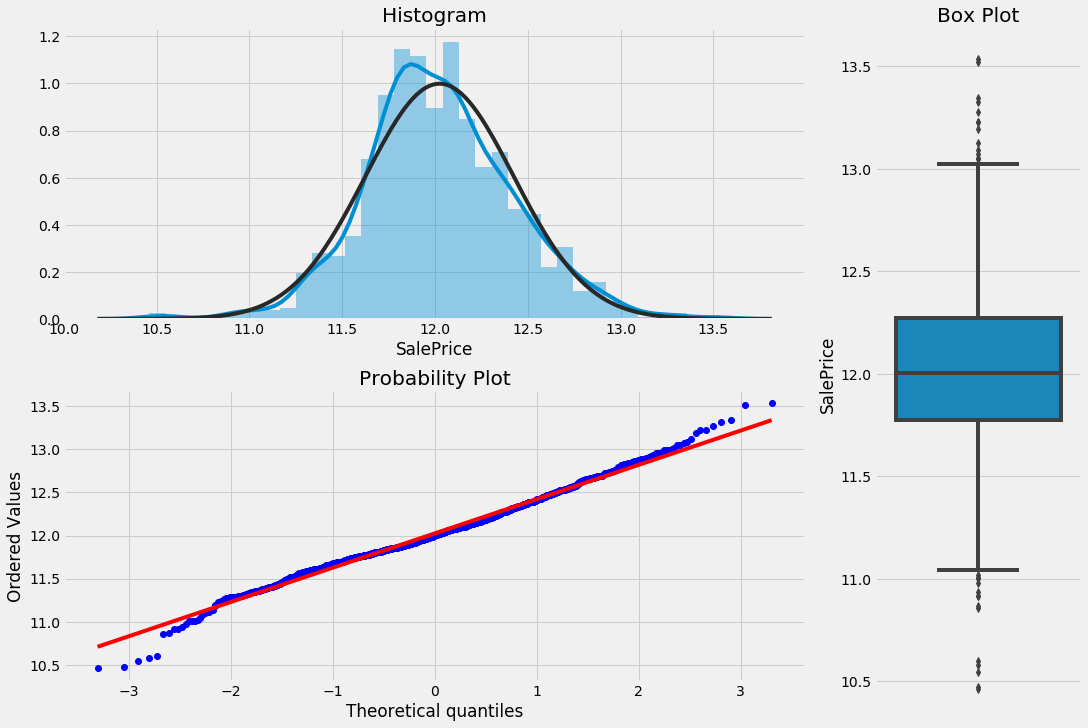

In [11]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
analyze_target(train_df, 'SalePrice')

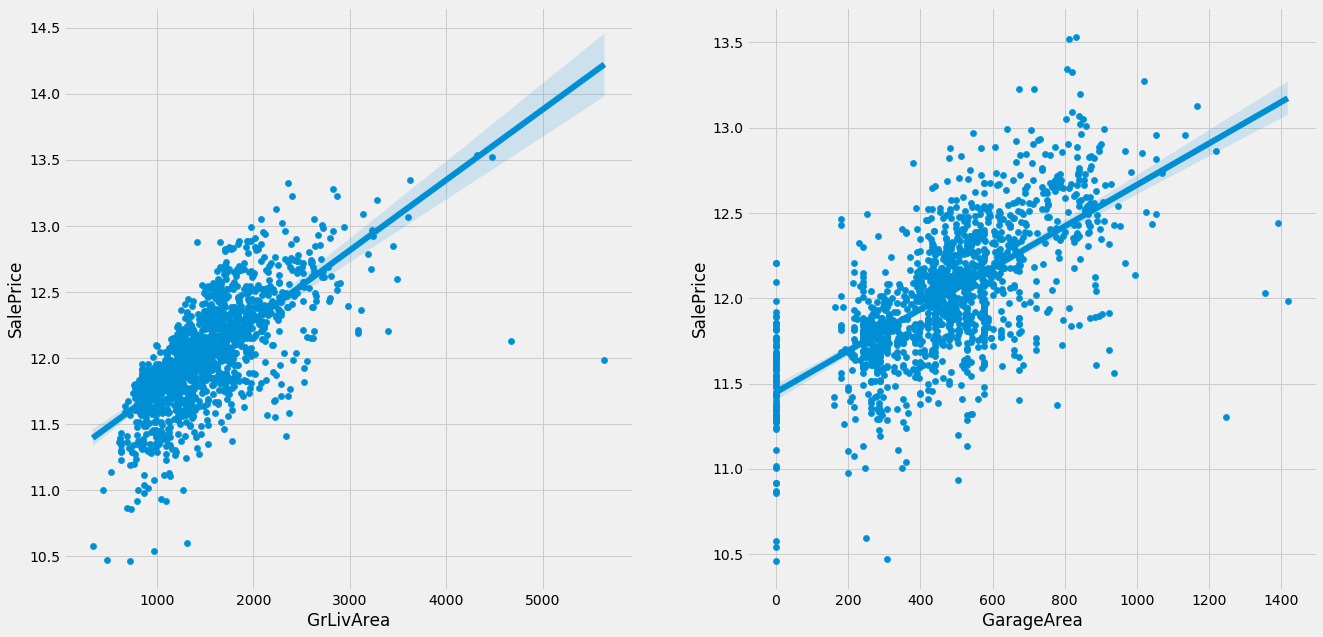

In [12]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols=2,sharey=False)

sns.scatterplot( x = train_df['GrLivArea'], y = train_df['SalePrice'],  ax=ax1)
sns.regplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], ax=ax1)

sns.scatterplot(x = train_df['GarageArea'],y = train_df['SalePrice'], ax=ax2)
sns.regplot(x=train_df['GarageArea'], y=train_df['SalePrice'], ax=ax2);

In [13]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


## Linear Regression

In [14]:

## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = train_df[['OverallQual', 'GrLivArea', 'GarageArea']]#, '1stFlrSF']]# 'LotArea', 'YrSold']] #, 'SalePrice']
y = train_df[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

print('MSE')
print(mean_squared_error(y_test, y_pred))
print('MAE')
print(mean_absolute_error(y_test, y_pred))

MSE
0.0375768726939076
MAE
0.13470196073209909


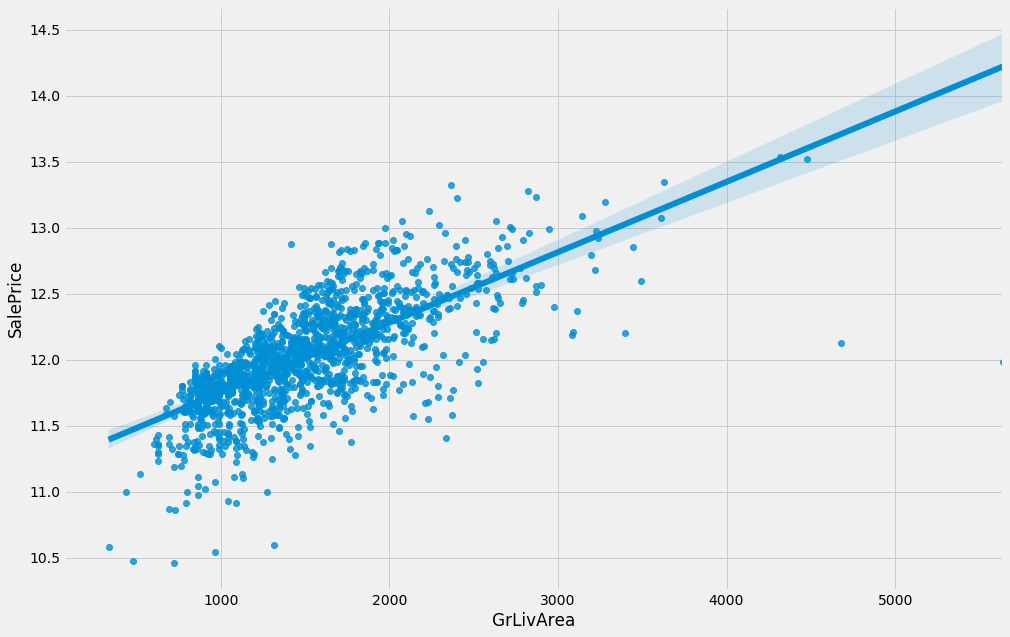

In [15]:
train_variables = ['OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF', 'SalePrice']
#sns.pairplot(train_df[train_variables], height= 2.5)
fig = plt.figure(figsize=(15,10))
sns.regplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.show()

## Ridge Regression

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

best_ridge = Ridge(alpha=0.01, normalize=True)
best_ridge.fit(X_train, y_train)
y_pred_ridge = best_ridge.predict(X_test)

print('MSE')
print(mean_squared_error(y_test, y_pred_ridge))
print('MAE')
print(mean_absolute_error(y_test, y_pred_ridge))

#y_pred_ridge = ridge_regressor.predict(X_test)

{'alpha': 0.01}
-0.03670189518290994
MSE
0.03750361884800507
MAE
0.13457907546670375


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso=Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

#lasso_regressor.fit(X_train, y_train)

# print(lasso_regressor.best_params_)
# print(lasso_regressor.best_score_)

best_lasso = Lasso(alpha=0.001, normalize=True)
best_lasso.fit(X_train, y_train)
y_pred_lasso = best_lasso.predict(X_test)

print('MSE')
print(mean_squared_error(y_test, y_pred_lasso))
print('MAE')
print(mean_absolute_error(y_test, y_pred_lasso))

MSE
0.03597194744291785
MAE
0.1334837570731208


In [18]:
from scipy.stats import anderson
anderson(train_df['SalePrice'])

AndersonResult(statistic=3.5388070480230454, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## Naive Bayes Classifier

In [19]:
sms_df = pd.read_csv("data/spam2.csv", delimiter=';')
sms_df = sms_df[['label', 'text']]
sms_df['text'] = sms_df['text'].astype(str)
sms_df.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [20]:
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

# Load stop words
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lehmann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from collections import Counter
import math

class NaiveBayes(object):
    '''
    This class implements a naive bayes classifier.
    '''
    
    def __init__(self, stopWordBoolean, stopWordList):
        '''
        Constructor
        '''
        # The following Counter will be used to count the number of text
        # occurrencies per label.
        self.label_counts = Counter()
        # The following dictionary will be used to map labels to Counters. Each of these Counters
        # contains the feature counts given the label.
        self.feature_counts = dict()
        # The following dictionary will be used to collect
        # prior probabilities of labels.
        self.label_probs = dict()
        # The following dictionary will be used to collect feature
        # probabilities given a label.
        self.feature_probs = dict()
        #A set that contains all words encountered during training.
        self.vocabulary = set()
        # final list of predictions
        self.predictions = list()
        # boolean to apply stopwords or not
        self.stopWordBool = stopWordBoolean
        # list of stopwords
        self.stop_words = stopWordList 
        
    def train(self, df):
        '''
        Train the classifier by counting features in the df.
        
        :param df: the training df
        '''
        for row in df.itertuples(index=False):
            if self.stopWordBool == True:
                no_stop_words = [word for word in row[1].split() if word not in self.stop_words]
                self.add_feature_counts(no_stop_words, row[0])
            else:
                self.add_feature_counts(row[1].split(), row[0])
    
    def add_feature_counts(self, features, label):
        '''
        Count the words in a given text
        
        :param words: a list of words from the text.
        :param label: the label of the text: ham or spam.
        '''
        if label in self.feature_counts:
            self.feature_counts[label].update(features)
        else:
            self.feature_counts[label] = Counter(features)
            
        # increment label counts
        self.label_counts.update([label])
        
        # update vocabulary set
        self.vocabulary.update(set(features))
        
    def complete_feature_counts(self):
        '''
        For each label and word that is in vocabulary but not in label, add the word with count=0
        and then perform smoothing so each word per label contains a probability
        '''
        for vocab in self.vocabulary:
            for label in self.feature_counts:
                if vocab not in self.feature_counts[label]:
                    self.feature_counts[label][vocab] = 0
                    
    def smooth_feature_counts(self, smoothing=1):
        '''Smooth the collected feature counts

        :param smoothing: The smoothing constant
        '''
        
        for keys in self.feature_counts:
            for keyCount in self.feature_counts[keys]:
                if keyCount in self.vocabulary:
                    self.feature_counts[keys][keyCount] += smoothing
                    
    def log_normalise_label_probs(self):
        '''
        Take label counts in label_counts, normalize them to
        probabilities, transform them to logprobs and update label_probs
        with the logprobs.
        '''
        # get total count of all labels to normalize them to probabilites
        total_count = sum(self.label_counts.values(), 0.0)
        # make each value in label_counts to a probability
        for count in self.label_counts:
        # add each label with transformed log probability to label_probs using log(a/b) = log(a)-log(b)
            self.label_probs[count] = math.log(self.label_counts[count]) - math.log(total_count)
    
    def log_normalise_feature_probs(self):
        '''
        Take feature counts in feature_counts and for each label, normalize
        them to probabilities and turn them into logprobs. update
        feature_probs with the created logprobs.
        '''
        
        # total count of features 
        total_count_feature = 0.0
        
        # normalize each value in feature_counts to a probabilty
        for label in self.feature_counts:
            total_per_feature = 0
            total_per_feature = sum(self.feature_counts[label].values(), 0.0)
            # create a dictionary for that particular label in feature_probs
            self.feature_probs[label] = dict()
            for word in self.feature_counts[label]:
                # add the transformed log probability per word into feature_probs using log(a/b) = log(a)-log(b)
                self.feature_probs[label][word] = math.log(self.feature_counts[label][word])-math.log(total_per_feature)
                
    def predict(self, data):
        ''' 
        Predict the most probable label according to the model on a stream of data.
        
        :param data: a list of words from df row
        :return: the most probable label for the data (type string)
        '''
        # only add words from data that are in vocabulary
        # for each line in the single test file
        checked_list = []
        
        #for line in data:
        #    word_list = line.split()
            # for the split line, add the word if the word is in the vocabulary, else do not consider it
            #for word in word_list:
        for word in data:
            if word in self.vocabulary:
                checked_list.append(word)
        # make a counter for the particular test example that has counts for words only checked 
        # with vocabulary
        extracted_features = Counter(checked_list)

    
        # get a list of the words in the to be predicted document
        words_extracted = [*extracted_features]
        
        # collect the likelihoods as lists with labels
        label_likelihoods_sum_logs = dict()
        
        for label in self.feature_probs:
            # make a dictionary with the label as key and value the cumulative sum of log probabilities
            label_likelihoods_sum_logs[label] = 0.0
            for word in words_extracted:
                # check if the word is under a particular label
                if word in self.feature_probs[label]:
                    # add the log probability as many times as it appears in extracted_feature counter
                    label_likelihoods_sum_logs[label] += extracted_features[word] * self.feature_probs[label][word]
                else:
                    # smoothing for words not found under particular label is 1/len(vocab)
                    label_likelihoods_sum_logs[label] += extracted_features[word] * (math.log(1) - math.log(len(self.vocabulary)))

        # to get the final prediction value we need to log(prior) + log(sum(likelihoods))
        prediction_dict = {key: self.label_probs.get(key, 0) + label_likelihoods_sum_logs.get(key, 0) for key in set(self.label_probs) | set(label_likelihoods_sum_logs)}


        # find the max value in predicion_dict and return the corresponding label as 
        # the predicted target
        predicted_target = max(prediction_dict.keys(), key=(lambda key: prediction_dict[key]))

        # append to prediction
        self.predictions.append(predicted_target)
        
        return predicted_target

### Basic Model

In [22]:
def data_transformations(df):
    train_df, test_df = train_test_split(df, test_size=0.33, random_state=0)
    
    train_df_1 = train_df.copy()
    test_df_1 = test_df.copy()
    
    train_df_2 = train_df.copy()
    train_df_2['text'] = train_df_2['text'].str.lower()
    train_df_2['text'] = train_df_2['text'].str.replace('[^\w\s]','')
    
    test_df_2 = test_df.copy()
    test_df_2['text'] = test_df_2['text'].str.lower()
    test_df_2['text'] = test_df_2['text'].str.replace('[^\w\s]','')
    
    train_df_3 = train_df.copy()
    test_df_3 = test_df.copy()
    
    return train_df_1, test_df_1, train_df_2, test_df_2, train_df_3, test_df_3

train_df_1, test_df_1, train_df_2, test_df_2, train_df_3, test_df_3 = data_transformations(sms_df)

In [23]:
def calculate_metrics(final_df):    
    final_df['TP'] = np.where((final_df['label'] == 'ham') & (final_df['prediction'] == 'ham'), 1, 0)
    final_df['TN'] = np.where((final_df['label'] == 'spam') & (final_df['prediction'] == 'spam'), 1, 0)
    final_df['FP'] = np.where((final_df['label'] == 'spam') & (final_df['prediction'] == 'ham'), 1, 0)
    final_df['FN'] = np.where((final_df['label'] == 'ham') & (final_df['prediction'] == 'spam'), 1, 0)
    print('True Positives')
    print(final_df['TP'].sum())
    print('True Negatives')
    print(final_df['TN'].sum())
    print('False Positives')
    print(final_df['FP'].sum())
    print('False Negatives')
    print(final_df['FN'].sum())

    print('Accuracy')
    print((final_df['TP'].sum() + final_df['TN'].sum())/len(final_df))

    print('Sensitivity')
    print(final_df['TP'].sum()/(final_df['TP'].sum()+final_df['FN'].sum()))
    print('Precision')
    print(final_df['TP'].sum()/(final_df['TP'].sum()+final_df['FP'].sum()))
    print('F1')
    print((2*final_df['TP'].sum())/(2*final_df['TP'].sum()+final_df['FP'].sum()+final_df['FN'].sum()))

### Model 1

In [24]:
X_test = test_df_1[['text']]
y_test = test_df_1[['label']]
from datetime import datetime
# create a classifier
stopWordBool = False
nbc1 = NaiveBayes(stopWordBool, stop_words)

### Training ###
print('Starting training at {}'.format(datetime.now()))
nbc1.train(train_df_1)

print("Starting to smooth and normalise at {}".format(datetime.now()))

nbc1.smooth_feature_counts()
nbc1.log_normalise_label_probs()
nbc1.log_normalise_feature_probs()

print("Finished training at {}".format(datetime.now()))

### Prediction ###
print("Start predicting at {}".format(datetime.now()))
for row in X_test.itertuples(index=False):
#     if stopWordBool == True:
#         no_stop_words = [word for word in row[0].split() if word not in stop_words]
#         nbc1.predict(no_stop_words)
#     else:    
    nbc1.predict(row[0].split())
        
print("Finished predicting at {}".format(datetime.now()))

### predictions and accuracy check ###
final_df = y_test.copy()
final_df['prediction'] = nbc1.predictions
final_df['acuracy'] = np.where(final_df['label']==final_df['prediction'], 1, 0)
calculate_metrics(final_df)

Starting training at 2020-04-19 17:02:21.689666
Starting to smooth and normalise at 2020-04-19 17:02:21.735543
Finished training at 2020-04-19 17:02:21.753494
Start predicting at 2020-04-19 17:02:21.753494
Finished predicting at 2020-04-19 17:02:21.856221
True Positives
1535
True Negatives
247
False Positives
14
False Negatives
43
Accuracy
0.9684782608695652
Sensitivity
0.9727503168567807
Precision
0.9909619109102646
F1
0.9817716661336745


### Model 2

In [27]:
X_test = test_df_3[['text']]
y_test = test_df_3[['label']]

from datetime import datetime
# create a classifier
stopWordBool = True
nbc3 = NaiveBayes(stopWordBool, stop_words)

### Training ###
print('Starting training at {}'.format(datetime.now()))
nbc3.train(train_df_3)

print("Starting to smooth and normalise at {}".format(datetime.now()))

nbc3.smooth_feature_counts()
nbc3.log_normalise_label_probs()
nbc3.log_normalise_feature_probs()

print("Finished training at {}".format(datetime.now()))

### Prediction ###
print("Start predicting at {}".format(datetime.now()))
for row in X_test.itertuples(index=False):
#     if stopWordBool == True:
#         no_stop_words = [word for word in row[0].split() if word not in stop_words]
#     else:    
    nbc3.predict(row[0].split())
print("Finished predicting at {}".format(datetime.now()))

### predictions and accuracy check ###
final_df = y_test.copy()
final_df['prediction'] = nbc3.predictions
final_df['acuracy'] = np.where(final_df['label']==final_df['prediction'], 1, 0)
calculate_metrics(final_df)

Starting training at 2020-04-19 17:02:22.259536
Starting to smooth and normalise at 2020-04-19 17:02:22.390345
Finished training at 2020-04-19 17:02:22.403313
Start predicting at 2020-04-19 17:02:22.403313
Finished predicting at 2020-04-19 17:02:22.486088
True Positives
1542
True Negatives
243
False Positives
18
False Negatives
36
Accuracy
0.970108695652174
Sensitivity
0.9771863117870723
Precision
0.9884615384615385
F1
0.982791586998088
